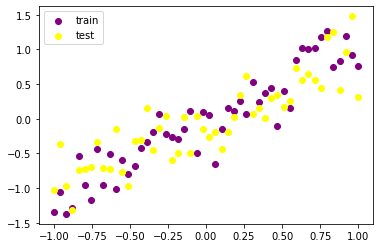

In [2]:
import torch as tc
from matplotlib import pyplot as plt
N = 50
noise = 0.3
X_train = tc.unsqueeze(tc.linspace(-1, 1, N), 1)
Y_train = X_train + noise * tc.normal(tc.zeros(N, 1), tc.ones(N, 1))

X_test = tc.unsqueeze(tc.linspace(-1, 1, N), 1)
Y_test = X_test + noise * tc.normal(tc.zeros(N, 1), tc.ones(N, 1))
plt.scatter(X_train, Y_train, color='purple', label='train')
plt.scatter(X_test, Y_test, color='yellow', label='test')
plt.legend()

In [3]:
from torch import nn
N_h = 100
model_normal = nn.Sequential(
    nn.Linear(1, N_h),
    nn.ReLU(),
    nn.Linear(N_h, N_h),
    nn.ReLU(),
    nn.Linear(N_h, 1)
)

model_dropout = nn.Sequential(
    nn.Linear(1, N_h),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_h, N_h),
    nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(N_h, 1)
)

In [4]:
from torch import optim

criterion = nn.MSELoss()
optimizer1 = optim.SGD(model_normal.parameters(), lr=0.1)
optimizer2 = optim.SGD(model_dropout.parameters(), lr=0.1)

for _ in range(1000):
    z1 = model_normal(X_train)
    optimizer1.zero_grad()
    loss1 = criterion(z1, Y_train)
    loss1.backward()
    optimizer1.step()
    
    z2 = model_dropout(X_train)
    optimizer2.zero_grad()
    loss2 = criterion(z2, Y_train)
    loss2.backward()
    optimizer2.step()

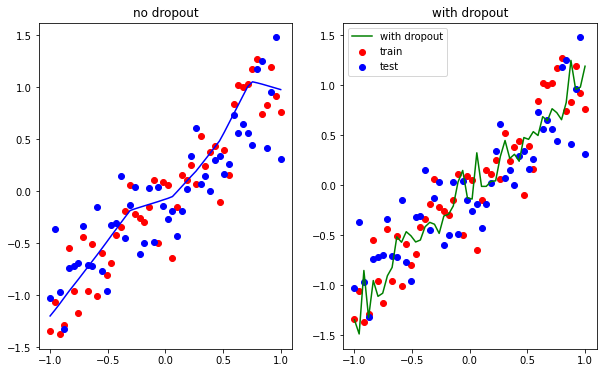

In [12]:
with tc.no_grad():
    Z1 = model_normal(X_test)
    Z2 = model_dropout(X_test)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('no dropout')
plt.scatter(X_train, Y_train, color='red', label='train')
plt.scatter(X_test, Y_test, color='blue', label='test')
plt.plot(X_test, Z1, color='blue', label='model normal')

plt.subplot(1, 2, 2)
plt.title('with dropout')
plt.scatter(X_train, Y_train, color='red', label='train')
plt.scatter(X_test, Y_test, color='blue', label='test')
plt.plot(X_test, Z2, color='green', label='with dropout')
plt.legend()
plt.show()